# Class Assignment 2: Brain Stroke

### Aphisit Jaemyaem st126130

In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

## 1. Load data

In [4]:
df = pd.read_csv("/Projects/python-project-starter/Hw+Assignment/Class Assignment/brain_stroke.csv")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,NaN,81.0,0.0,0.0,Yes,Private,Urban,NaN,29.0,formerly smoked,1


### Train test split

In [5]:
X = df.drop(columns=['stroke']) 
y = df['stroke']                

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
X_train.shape

(3486, 10)

In [8]:
X_test.shape

(1495, 10)

In [9]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4260,Female,56.0,0.0,0.0,Yes,Self-employed,Urban,98.14,32.7,formerly smoked
1658,Male,35.0,0.0,0.0,Yes,Private,Urban,82.81,23.9,never smoked
1151,Male,15.0,0.0,0.0,No,Private,Rural,78.59,25.1,Unknown
3975,Male,55.0,0.0,0.0,Yes,Private,Rural,80.35,28.7,smokes
647,Female,13.0,0.0,0.0,No,children,Rural,63.26,19.5,Unknown


In [10]:
X_test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1129,Female,65.00,1.0,0.0,Yes,Private,Urban,180.76,26.9,Unknown
3671,Female,11.00,0.0,0.0,No,children,Rural,93.51,20.8,Unknown
1041,Male,1.56,0.0,0.0,No,children,Rural,93.74,20.1,Unknown
2072,Female,49.00,0.0,0.0,Yes,Self-employed,Rural,68.44,23.0,smokes
1375,Female,49.00,1.0,0.0,Yes,Govt_job,Rural,107.91,25.0,Unknown


### Class imbalance

In [11]:
#first upsample / downsample
smote = SMOTE(random_state = 11)
X_train, y_train = smote.fit_resample(X_train, y_train)
#then do scaling + modeling
pipeline = Pipeline(steps = [['scaler', MinMaxScaler()], ['classifier',
LogisticRegression(random_state=11, max_iter=1000)]])
param_grid = ....
kfold = ....
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='roc_auc',
cv=kfold, n_jobs=-1)


SyntaxError: invalid syntax (229504461.py, line 7)

### Label encoding

In [122]:
X_train.dtypes

gender                object
age                  float64
hypertension         float64
heart_disease        float64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
dtype: object

In [123]:
from sklearn.preprocessing import LabelEncoder

#label gender and ever_married feature (binary)
le = LabelEncoder()
#label encode gender
df_train['gender'] = le.fit_transform(df_train['gender'])
df_test['gender'] = le.fit_transform(df_test['gender'])

#label encode ever_married
df_train['ever_married'] = le.fit_transform(df_train['ever_married'])
df_test['ever_married'] = le.fit_transform(df_test['ever_married'])


In [124]:
df_train.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
112,1,76.0,0.0,0.0,1,140.10,29.9,1,True,False,False,True,True,False,False
56,0,80.0,1.0,0.0,1,72.67,28.9,1,False,True,False,False,False,True,False
4812,0,80.0,0.0,0.0,1,110.66,27.3,1,False,False,False,True,False,False,False
63,0,79.0,0.0,0.0,1,110.85,24.1,1,True,False,False,True,True,False,False
4819,1,71.0,1.0,0.0,1,87.80,30.8,1,False,True,False,False,False,False,False


### One hot encoding

In [125]:
#one-hot encode for work_type, Residence_type and smoking_status feature

#one-hot encode work_type
df_train = pd.get_dummies(df_train, columns=['work_type'], drop_first=True)
df_test  = pd.get_dummies(df_test,  columns=['work_type'], drop_first=True)

#one-hot encode Residence_type
df_train = pd.get_dummies(df_train, columns=['Residence_type'], drop_first=True)
df_test  = pd.get_dummies(df_test,  columns=['Residence_type'], drop_first=True)

#one-hot encode smoking_status
df_train = pd.get_dummies(df_train, columns=['smoking_status'], drop_first=True)
df_test  = pd.get_dummies(df_test,  columns=['smoking_status'], drop_first=True)

KeyError: "None of [Index(['work_type'], dtype='object')] are in the [columns]"

In [126]:
df_train.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
112,1,76.0,0.0,0.0,1,140.10,29.9,1,True,False,False,True,True,False,False
56,0,80.0,1.0,0.0,1,72.67,28.9,1,False,True,False,False,False,True,False
4812,0,80.0,0.0,0.0,1,110.66,27.3,1,False,False,False,True,False,False,False
63,0,79.0,0.0,0.0,1,110.85,24.1,1,True,False,False,True,True,False,False
4819,1,71.0,1.0,0.0,1,87.80,30.8,1,False,True,False,False,False,False,False


## 2. EDA (Exploratory Data Analysis)

In [127]:
#Check the data type
df_train.dtypes
df_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'stroke', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [128]:
df_train.dtypes
num_col = df_train.select_dtypes(include=['int64', 'float64'])
cat_col = df_train.select_dtypes(exclude=['int64', 'float64'])
num_col.columns, cat_col.columns

(Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
        'avg_glucose_level', 'bmi', 'stroke'],
       dtype='object'),
 Index(['work_type_Private', 'work_type_Self-employed', 'work_type_children',
        'Residence_type_Urban', 'smoking_status_formerly smoked',
        'smoking_status_never smoked', 'smoking_status_smokes'],
       dtype='object'))

### Barplot

In [129]:
import seaborn as sns

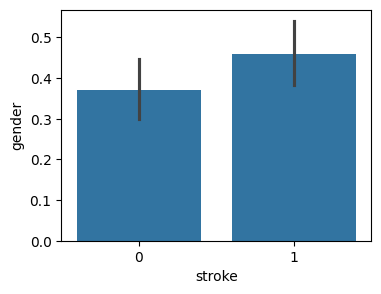

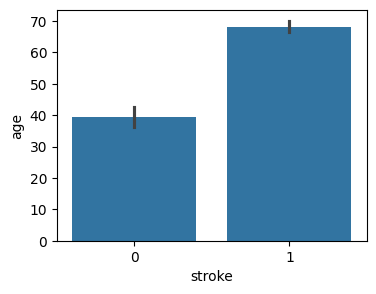

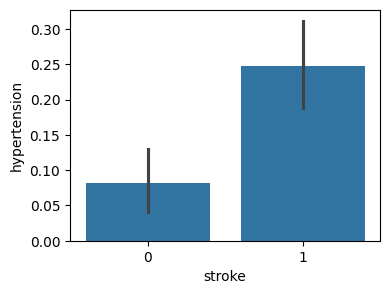

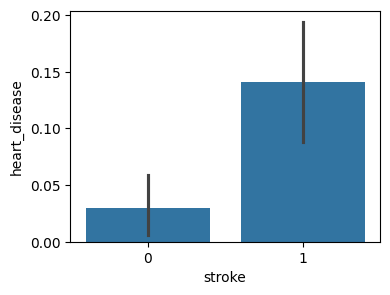

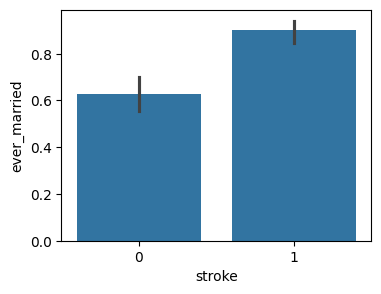

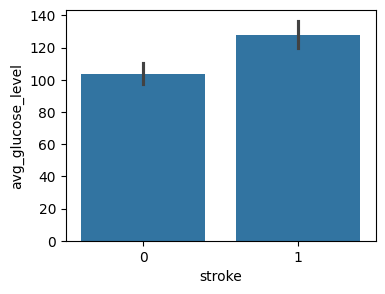

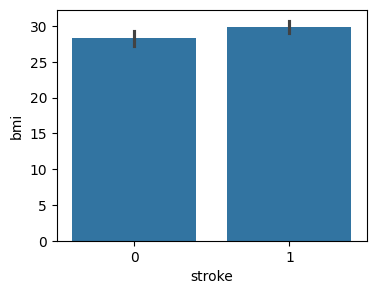

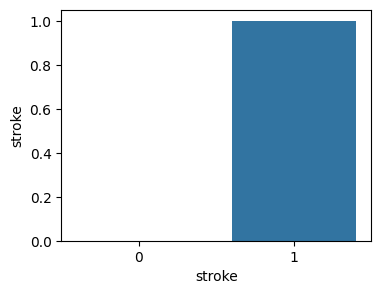

In [130]:
#for numerical type, lets plot some a bar plot with stroke
for col in num_col.columns:
    plt.figure(figsize=(4, 3))
    sns.barplot(x = df_train['stroke'], y = df_train[col])
    plt.show()

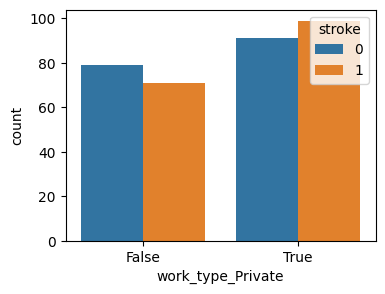

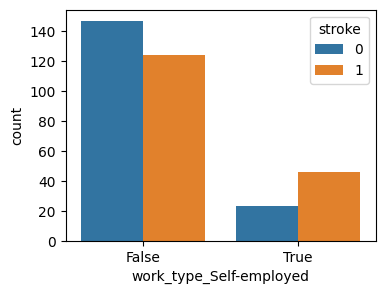

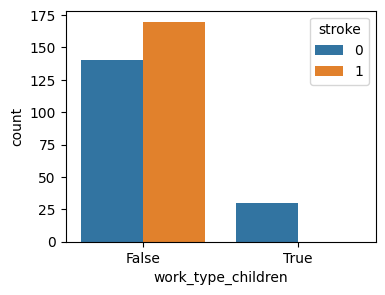

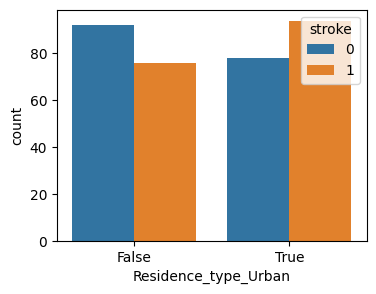

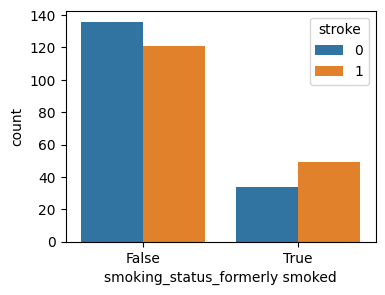

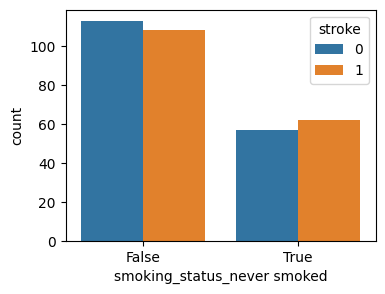

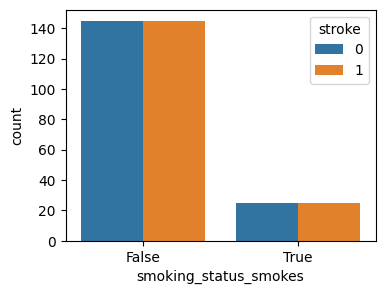

In [131]:
#for categorial type, you may want to use countplot with stroke
for col in cat_col.columns:
    plt.figure(figsize=(4, 3))
    sns.countplot(x = df_train[col], hue = df_train['stroke'])
    #similar to hue in scatterplot
    plt.show()

### Correlation matrix

<Axes: >

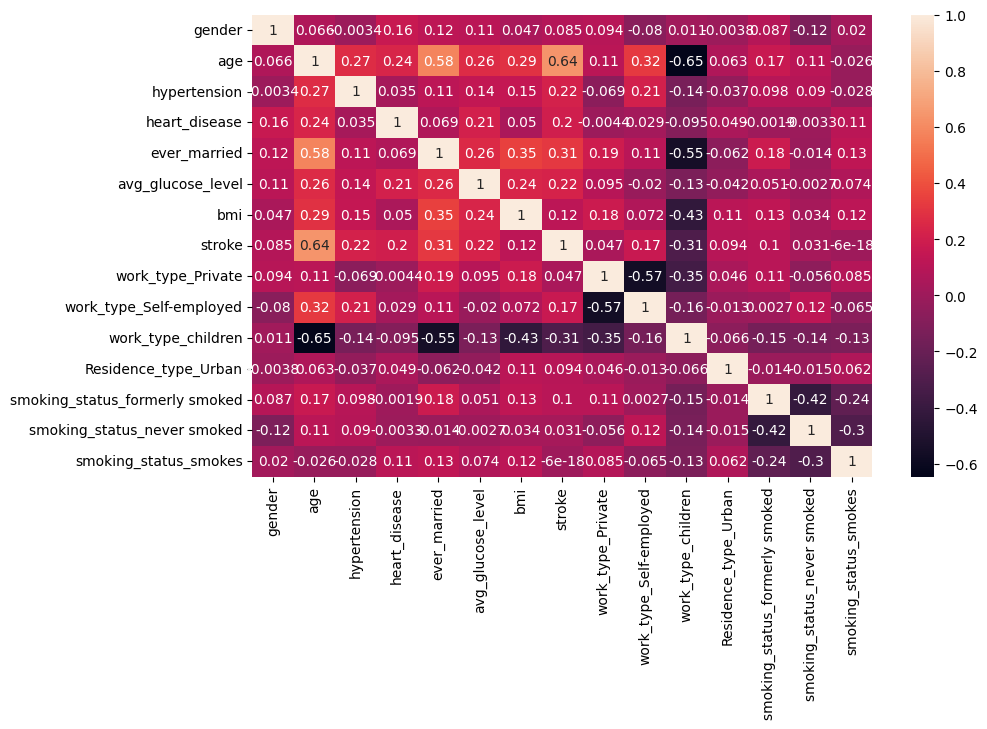

In [132]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_train.corr(), annot=True)

### 3. Feature Engineering 
skipped

### 4. Feature Selection
already splitted

### 5. Preprocessing

#### Check null values

In [133]:
df_train.isna().sum()
#avg_glucose_level median or mean

gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
avg_glucose_level                 0
bmi                               0
stroke                            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [134]:
df_train.avg_glucose_level

112     140.10
56       72.67
4812    110.66
63      110.85
4819     87.80
         ...  
1707     75.43
4574     72.56
3129     81.73
2460     90.92
1866    108.75
Name: avg_glucose_level, Length: 340, dtype: float64

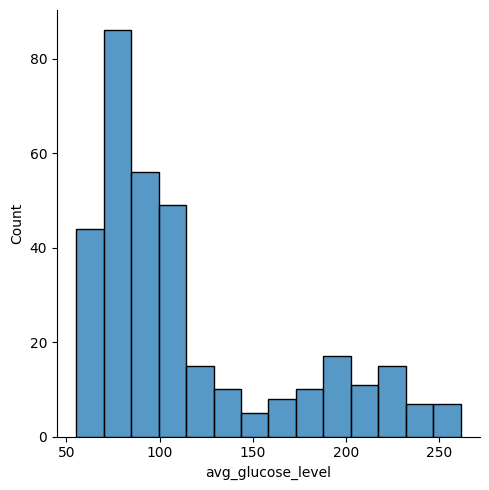

In [135]:
sns.displot(data = df_train, x = df_train['avg_glucose_level'] )

In [136]:
df_train['avg_glucose_level'].fillna(df_train['avg_glucose_level'].median(), inplace=True)

In [137]:
#check null again
df_train.isna().sum()

gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
avg_glucose_level                 0
bmi                               0
stroke                            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [138]:
df_test.isna().sum()

gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
avg_glucose_level                 0
bmi                               0
stroke                            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [139]:
df_test['avg_glucose_level'].fillna(df_test['avg_glucose_level'].median(), inplace=True)

/tmp/ipykernel_666/3784240061.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['avg_glucose_level'].fillna(df_test['avg_glucose_level'].median(), inplace=True)


In [140]:
df_test.isna().sum()

gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
avg_glucose_level                 0
bmi                               0
stroke                            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

## 6. Modeling

In [141]:
#set the X and y
X_train = df_train[ ['gender', 'hypertension', 'avg_glucose_level', 'smoking_status_formerly smoked'] ]
y_train = df_train['stroke']

X_test = df_test[ ['gender', 'hypertension', 'avg_glucose_level', 'smoking_status_formerly smoked']]


#make sure the shape of X is (samples, features), and y is (samples, )
assert X_train.ndim == 2
assert X_test.ndim  == 2
assert y_train.ndim == 1

print("(samples, features): ", X_train.shape)
print("(samples, features): ", X_test.shape)
print("(samples,         ): ", y_train.shape)

(samples, features):  (340, 4)
(samples, features):  (1495, 4)
(samples,         ):  (340,)


In [142]:
#perform cross validation with a selected set of models, to scope down which model is among the best

#specify the list of algorithms
from sklearn.linear_model import LogisticRegression  
from sklearn.naive_bayes import GaussianNB 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier  
from sklearn.svm import SVC  
from sklearn.ensemble import GradientBoostingClassifier  
    
lr = LogisticRegression(random_state=999)
rf = RandomForestClassifier(random_state=999)
sv = SVC(random_state=999)

models = [lr, rf, sv]

#perform cross validation using KFold
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits = 5, shuffle = True, random_state=999)

for model in models:
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')  
    print("Scores: ", score, "- Scores mean: ", score.mean(), "- Scores std (lower better): ", score.std())  

Scores:  [0.67647059 0.67647059 0.57352941 0.64705882 0.67647059] - Scores mean:  0.65 - Scores std (lower better):  0.03989605872426631
Scores:  [0.58823529 0.48529412 0.41176471 0.54411765 0.60294118] - Scores mean:  0.5264705882352941 - Scores std (lower better):  0.07046557971006435
Scores:  [0.58823529 0.64705882 0.54411765 0.57352941 0.63235294] - Scores mean:  0.5970588235294116 - Scores std (lower better):  0.0378944080197798


In [143]:
#grid search to find the best version of that model

from sklearn.model_selection import GridSearchCV

model = LogisticRegression(random_state=999) 

param_grid = dict()
param_grid['solver'] = ['newton-cg', 'lbfgs', 'liblinear']  

grid = GridSearchCV(model, param_grid, scoring="accuracy", cv=kfold, refit=True, return_train_score=True)

grid.fit(X_train, y_train) 

print(grid.cv_results_)

{'mean_fit_time': array([0.00357575, 0.00423059, 0.0014605 ]), 'std_fit_time': array([0.00167063, 0.00166179, 0.00050063]), 'mean_score_time': array([0.00112305, 0.00098968, 0.00084496]), 'std_score_time': array([0.00030591, 0.00011503, 0.00011392]), 'param_solver': masked_array(data=['newton-cg', 'lbfgs', 'liblinear'],
             mask=[False, False, False],
       fill_value=np.str_('?'),
            dtype=object), 'params': [{'solver': 'newton-cg'}, {'solver': 'lbfgs'}, {'solver': 'liblinear'}], 'split0_test_score': array([0.67647059, 0.67647059, 0.69117647]), 'split1_test_score': array([0.67647059, 0.67647059, 0.67647059]), 'split2_test_score': array([0.57352941, 0.57352941, 0.57352941]), 'split3_test_score': array([0.64705882, 0.64705882, 0.64705882]), 'split4_test_score': array([0.67647059, 0.67647059, 0.64705882]), 'mean_test_score': array([0.65      , 0.65      , 0.64705882]), 'std_test_score': array([0.03989606, 0.03989606, 0.04054132]), 'rank_test_score': array([1, 1, 3], dt

## 7. Testing

In [144]:
pred_y = grid.predict(X_test)

print(pred_y)

[1 0 0 ... 0 0 1]


In [145]:
accuracy_score(y_test, pred_y) 

0.7578595317725753

### Classification metrics

0.7578595317725753
0.12234042553191489
0.5897435897435898
0.2026431718061674
              precision    recall  f1-score   support

           0       0.97      0.77      0.86      1417
           1       0.12      0.59      0.20        78

    accuracy                           0.76      1495
   macro avg       0.55      0.68      0.53      1495
weighted avg       0.93      0.76      0.82      1495



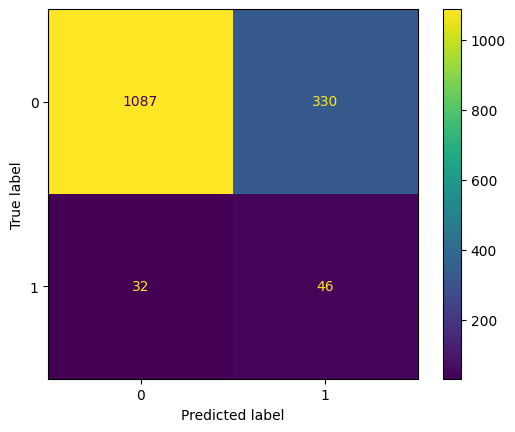

In [146]:
# confusion matrix 
    
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(accuracy_score(y_test, pred_y))
print(precision_score(y_test, pred_y))
print(recall_score(y_test, pred_y))
print(f1_score(y_test, pred_y))

print(classification_report(y_test, pred_y))

cm = confusion_matrix(y_test, pred_y)
cmp = ConfusionMatrixDisplay(cm, display_labels=[0, 1])

cmp.plot()

#for regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## 8. Analysis: Feature Importance

In [147]:
grid.best_estimator_

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,999
,solver,'newton-cg'
,max_iter,100
,multi_class,'deprecated'


In [148]:
grid.best_estimator_.coef_
#['gender', 'hypertension', 'avg_glucose_level', 'smoking_status_formerly smoked']

array([[0.25049344, 1.0632459 , 0.00788802, 0.33258737]])

<Axes: ylabel='features'>

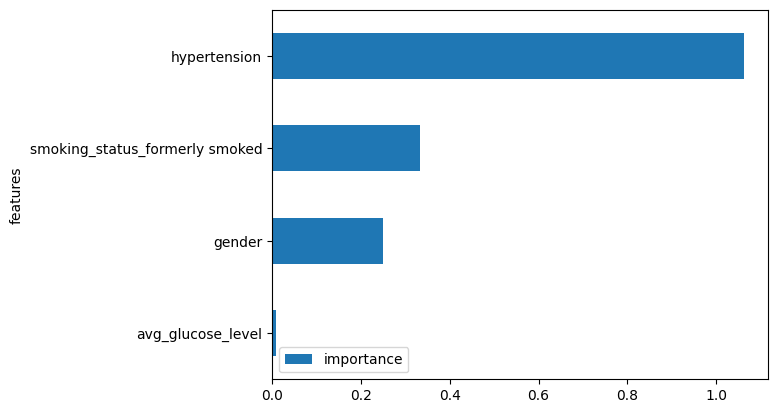

In [149]:
feature_importance = pd.DataFrame(['gender', 'hypertension', 'avg_glucose_level', 'smoking_status_formerly smoked'], 
                                  columns=['features'])
feature_importance["importance"] = grid.best_estimator_.coef_[0]

feature_importance = feature_importance.sort_values(by = ['importance'], ascending=True)

feature_importance.plot.barh(x='features', y='importance')

## 9. Inference

In [150]:
import pickle

# save the model
filename = 'model/Stroke_Prediction.pkl'
pickle.dump(grid, open(filename,'wb'))

# Load the model
loaded_grid=pickle.load(open(filename,'rb'))

In [151]:
df_train[['gender', 'hypertension', 'avg_glucose_level', 'smoking_status_formerly smoked','stroke']].loc[1]

gender                                 1
hypertension                         0.0
avg_glucose_level                 105.92
smoking_status_formerly smoked     False
stroke                                 1
Name: 1, dtype: object

In [152]:
sample = np.array([[0, 1, 150, 0]])

In [153]:
predicted_stroke= loaded_grid.predict(sample)
predicted_stroke

/Projects/Python-for-Machine-Learning/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])